In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#Número Top de Gens. En aquest cas vull els TOP100
n=100

#Fitxer que contè en CV els gens codifcants de PROTEÏNES més epxressats de manera ordenada decreixent.
teixits = pd.read_csv('D:/TFM/ANALISI_MODELS/Datasets/all_gensCV_noversio_PROTEIN_ZA.csv',sep =",")

In [2]:
#data = teixits.iloc[:, 1:4]
data=teixits

In [3]:
if (n==0 or n>(len(teixits.columns)-3)):
    n=len(teixits.columns)-3
    
data = teixits.iloc[:, 2:n+3]

In [4]:
data

,SMTSD,ENSG00000160882,ENSG00000259384,ENSG00000172023,ENSG00000172179,ENSG00000169248,ENSG00000159723,ENSG00000115386,ENSG00000174576,ENSG00000170498,...,ENSG00000160838,ENSG00000183644,ENSG00000136918,ENSG00000160401,ENSG00000171551,ENSG00000077327,ENSG00000141574,ENSG00000152611,ENSG00000167858,ENSG00000169429
0,Brain - Cortex,0.35630,0.0000,0.00000,0.00000,0.03501,0.30600,0.1653,1.57600,0.2355,...,0.11430,0.16400,0.14560,1.0490,0.2448,1.06500,0.8121,0.5297,0.45220,0.8671
1,Brain - Cerebellum,0.43660,0.2089,0.73670,0.00000,0.21980,0.48040,4.3470,7.05500,2.3660,...,0.17930,0.00000,0.34290,1.2500,0.4758,0.06744,1.7180,0.2772,0.36220,0.4712
2,Brain - Cortex,0.18460,4.2000,1.93800,8.21200,0.68150,0.11610,6.2180,1.06300,0.1667,...,0.11230,0.05806,0.02148,0.7221,0.1857,0.82880,0.3394,0.5208,0.48180,0.2361
3,Brain - Cerebellum,0.09784,15.7600,0.12580,9.01800,0.45040,0.28120,0.8642,4.14200,1.9700,...,0.57160,0.03518,0.07807,1.7500,0.2437,0.05528,0.3265,0.1893,0.08905,0.4022
4,Brain - Cortex,0.01387,6.9020,0.06242,11.84000,0.11180,0.34890,0.6267,3.72300,0.4135,...,0.12160,0.05236,0.13560,0.7907,0.9489,1.63900,0.3511,0.1644,0.53760,0.9581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,Brain - Cortex,0.34510,0.0000,1.62900,0.00000,28.63000,0.50800,3.6430,0.37170,0.1369,...,0.06147,0.02118,0.04701,0.9596,1.1180,1.14800,1.3330,0.5130,0.32170,17.5200
2637,Brain - Cerebellum,0.39970,0.7800,1.74600,0.00000,0.00000,0.65050,3.0750,0.36890,2.2940,...,0.41210,0.00000,0.52530,1.3400,0.1577,0.02325,0.2441,0.3582,0.36200,0.8346
2638,Brain - Cortex,0.22160,8.2930,1.51900,11.39000,0.08501,0.58380,5.9720,0.61310,0.1144,...,0.41610,0.02656,0.41260,0.7077,5.1520,0.78240,1.6300,0.6074,0.89640,73.4700
2639,Brain - Cerebellum,0.00000,1.8660,0.00000,0.55470,0.00000,0.42440,0.3344,0.08171,1.4480,...,0.12330,0.00000,0.00000,4.4020,0.3018,0.02781,0.4198,0.3809,0.41810,1.9700


In [5]:
#Creació conjunt train i test

x,y=data.iloc[:, 1:n+1],data.iloc[:, 0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

x_train = np.log2(x_train+1)
x_test = np.log2(x_test+1)

In [6]:
#Definim PCA

pca = PCA()

z= pca.fit_transform(x_train)

x_train_pca = z
x_test_pca  = pca.transform(x_test)

38 components expliquen un 95% de la variança. De 100 dimensions a 38


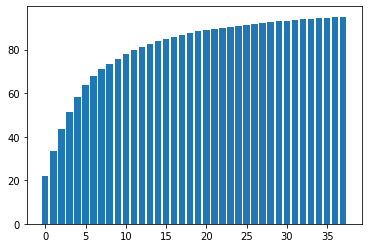

In [7]:
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components expliquen un 95% de la variança. De ",n," dimensions a ", k, sep='')

pca = PCA(n_components=k)

x_train.pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [8]:
#Dinàmicament agafo el numero de Dimensions de PCA: k

principalDf = pd.DataFrame(data = x_train_pca[:,0:k])
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-1.874050,7.836014,0.648604,-2.136135,-0.048421,-5.509700,2.013251,2.996801,2.001890,2.146489,...,-0.900206,0.520662,2.263392,1.380380,0.669098,-0.735178,0.935622,0.039935,-0.891690,0.093613
1,-4.901616,5.096902,-0.842938,-1.878812,-0.547584,3.667129,-0.792821,-0.807767,0.841731,0.009890,...,-0.759405,0.116843,-0.542403,0.246942,-0.491071,-0.679694,0.451210,-0.757120,0.160257,0.202262
2,-0.788626,-3.447937,3.839671,3.306861,2.500608,0.311752,0.485861,-1.482179,0.278497,-0.771613,...,-0.222463,0.111353,-0.448882,-2.348110,-1.430760,1.710338,1.077751,0.563628,1.144885,1.468532
3,-4.037340,-3.837439,-5.513627,-2.496180,1.201503,1.671548,-0.288309,-0.525338,1.740668,0.881807,...,0.106294,-0.159223,0.012042,-0.099746,-0.295866,-0.000415,0.240462,-0.210621,-0.211011,0.160895
4,-3.944319,-2.844083,-2.892551,-2.346786,1.302945,-1.179682,0.359600,0.348417,2.611943,-0.285551,...,-0.402419,-0.555706,0.633278,0.066018,-0.450074,-0.402954,-0.057696,-0.364841,-0.138790,-0.037110


In [9]:
x_train_pca[:,0:11].shape

(2112, 11)

In [10]:
principalDf.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

finalDF = pd.concat([principalDf, y_train], axis=1)

finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,SMTSD
0,-1.874050,7.836014,0.648604,-2.136135,-0.048421,-5.509700,2.013251,2.996801,2.001890,2.146489,...,0.520662,2.263392,1.380380,0.669098,-0.735178,0.935622,0.039935,-0.891690,0.093613,Brain - Hippocampus
1,-4.901616,5.096902,-0.842938,-1.878812,-0.547584,3.667129,-0.792821,-0.807767,0.841731,0.009890,...,0.116843,-0.542403,0.246942,-0.491071,-0.679694,0.451210,-0.757120,0.160257,0.202262,Brain - Cerebellum
2,-0.788626,-3.447937,3.839671,3.306861,2.500608,0.311752,0.485861,-1.482179,0.278497,-0.771613,...,0.111353,-0.448882,-2.348110,-1.430760,1.710338,1.077751,0.563628,1.144885,1.468532,Brain - Frontal Cortex (BA9)
3,-4.037340,-3.837439,-5.513627,-2.496180,1.201503,1.671548,-0.288309,-0.525338,1.740668,0.881807,...,-0.159223,0.012042,-0.099746,-0.295866,-0.000415,0.240462,-0.210621,-0.211011,0.160895,Brain - Nucleus accumbens (basal ganglia)
4,-3.944319,-2.844083,-2.892551,-2.346786,1.302945,-1.179682,0.359600,0.348417,2.611943,-0.285551,...,-0.555706,0.633278,0.066018,-0.450074,-0.402954,-0.057696,-0.364841,-0.138790,-0.037110,Brain - Frontal Cortex (BA9)


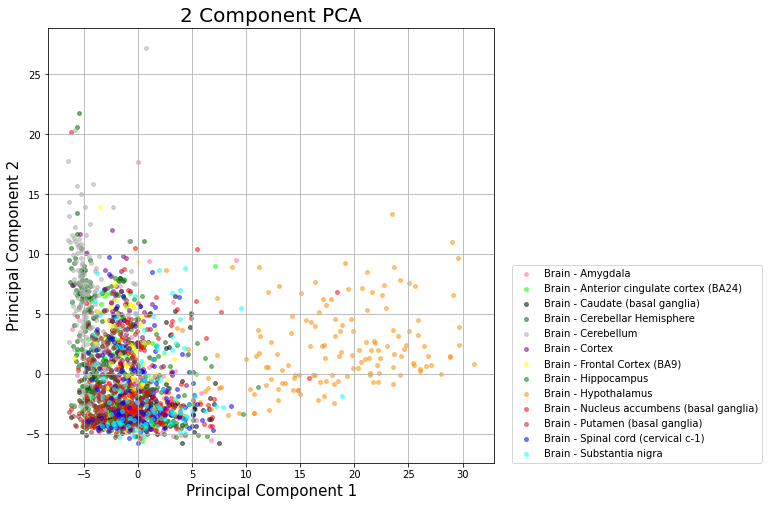

In [11]:
#Visualitzo la projecció 2D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

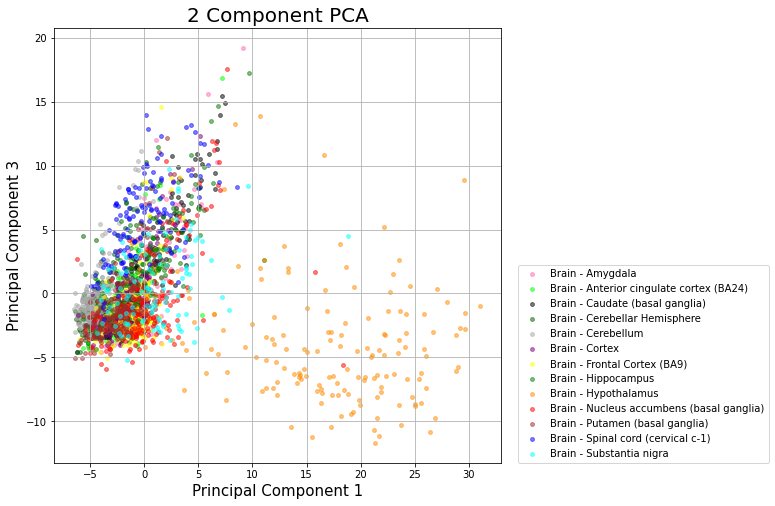

In [12]:

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 2]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

<b>tSNE Perplexity 30</b>

In [13]:
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, random_state=1234)

points = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame({'X':points[:,0],
                        'Y':points[:,1],
                        'Tipus Teixit':y_train})
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2112 samples in 0.001s...
[t-SNE] Computed neighbors for 2112 samples in 0.132s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2112
[t-SNE] Computed conditional probabilities for sample 2000 / 2112
[t-SNE] Computed conditional probabilities for sample 2112 / 2112
[t-SNE] Mean sigma: 2.876023
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.907021
[t-SNE] KL divergence after 1000 iterations: 1.172292


,X,Y,Tipus Teixit
0,-19.038460,-2.975874,Brain - Hippocampus
1,-26.112377,48.743828,Brain - Cerebellum
2,13.528234,-32.132256,Brain - Frontal Cortex (BA9)
3,12.581457,-19.427202,Brain - Nucleus accumbens (basal ganglia)
4,11.199200,-22.432991,Brain - Frontal Cortex (BA9)


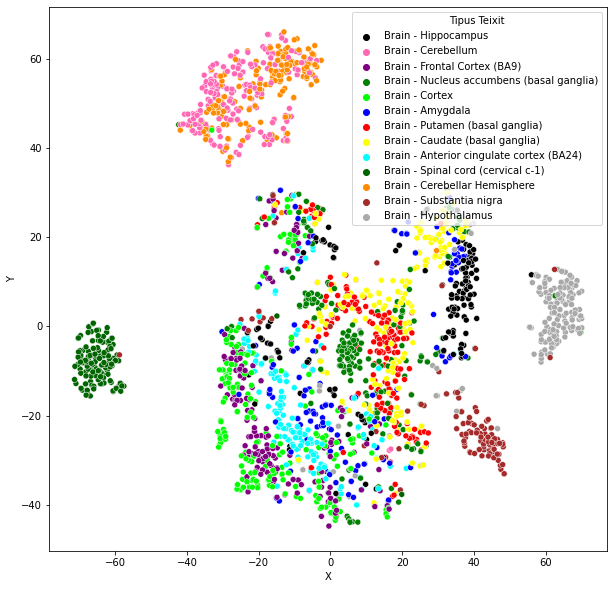

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x="X", y="Y",
              hue="Tipus Teixit",
              palette=["black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"],
              #legend='full',              
              data=tsne_df);

<b>Realització de Models</b>

<b>Model Classificador kNN</b>

In [15]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={"n_neighbors":range(5,25), "weights": ["uniform","distance"]}


# Validació creuada
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


grid = GridSearchCV(model , param_grid = param_grid,
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,                           
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(kNN) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model2 = grid.best_estimator_

r_model2 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions2 = model2.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions2,
            normalize = True
           )
print("")
print(f"(kNN) El accuracy de test és: {100*accuracy2}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions2,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 40 candidates, totalling 400 fits
40 # Prec. mitjana:  67.28337655369756  desv.:  2.4396100745461418  paràmetres:  {'n_neighbors': 5, 'weights': 'uniform'}
39 # Prec. mitjana:  67.66051149065547  desv.:  2.557655806109799  paràmetres:  {'n_neighbors': 5, 'weights': 'distance'}
38 # Prec. mitjana:  67.70857551640883  desv.:  2.5186655531029416  paràmetres:  {'n_neighbors': 6, 'weights': 'uniform'}
36 # Prec. mitjana:  68.08772243584012  desv.:  2.580268102532761  paràmetres:  {'n_neighbors': 6, 'weights': 'distance'}
37 # Prec. mitjana:  67.94643655548602  desv.:  2.5424382998211272  paràmetres:  {'n_neighbors': 7, 'weights': 'uniform'}
35 # Prec. mitjana:  68.46664580166323  desv.:  2.3604989916369528  paràmetres:  {'n_neighbors': 7, 'weights': 'distance'}
34 # Prec. mitjana:  68.98640794062416  desv.:  2.6013026756388347  paràmetres:  {'n_neighbors': 8, 'weights': 'uniform'}
26 # Prec. mitjana:  69.55602253420369  desv.:  3.052470385446928  paràmetres:  {'

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,22,3,0,0,0,2,3,2,0,1,1,0,0
Brain - Anterior cingulate cortex (BA24),1,23,0,0,0,1,1,0,0,1,1,0,0
Brain - Caudate (basal ganglia),0,0,41,0,0,1,0,1,0,0,9,0,0
Brain - Cerebellar Hemisphere,0,0,0,35,16,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,16,39,0,0,0,0,0,0,0,0
Brain - Cortex,0,3,0,0,0,35,4,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,0,0,0,0,12,18,0,0,1,2,0,0
Brain - Hippocampus,2,9,0,0,0,2,2,25,0,1,0,0,0
Brain - Hypothalamus,0,0,2,1,0,0,0,0,35,1,0,0,0


<b>SVM</b>

In [16]:
#Emprant Reducció PCA
#============================
# Grid d'hiperparàmetres
# ==============================================================================
param_grid = {"C": (0.01, 0.1, 1, 10, 100, 150, 200, 250 , 300, 1000), "gamma": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.005, 0.1,0.5, 1, 10)}

# Validació creuada
# ==============================================================================
from sklearn import svm

model = svm.SVC()
grid = GridSearchCV(model, param_grid = param_grid,                           
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)

    
# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(SVM) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model3 = grid.best_estimator_

r_model3 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions3 = model3.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy3 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions3,
            normalize = True
           )
print("")
print(f"(SVM) El accuracy de test és: {100*accuracy3}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions3,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
68 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-06}
68 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-05}
68 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.0001}
68 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.001}
68 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.01}
68 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.005}
68 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.1}
68 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.5}
68 # Prec. mitjana:  10.038004113386389  desv.:  0.

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,33,0,0,0,0,0,0,1,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),2,24,0,0,0,1,0,0,0,1,0,0,0
Brain - Caudate (basal ganglia),0,0,44,0,0,0,0,1,0,1,6,0,0
Brain - Cerebellar Hemisphere,0,0,0,38,13,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,10,45,0,0,0,0,0,0,0,0
Brain - Cortex,0,2,0,0,0,36,4,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),2,0,0,0,0,3,28,0,0,0,0,0,0
Brain - Hippocampus,1,6,0,0,0,1,0,33,0,0,0,0,0
Brain - Hypothalamus,0,0,0,0,1,0,0,0,36,1,1,0,0


<b>Arbres de decisió</b>

In [17]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'min_samples_split' :(2, 10, 20, 50 ,75,100,500,1000),'max_depth':(4,5,6,7,8,9,10,20,50,100,200,300,400,450,460,470,500,550,600,650,700,1000)}

# Validació creuada
# ==============================================================================
import sklearn.tree

model=sklearn.tree.DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Arbre de Decissió) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model4 = grid.best_estimator_

r_model4 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions4 = model4.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy4 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions4,
            normalize = True
           )
print("")
print(f"(Arbre de Decissió) El accuracy de test és: {100*accuracy4}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions4,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
152 # Prec. mitjana:  40.29129035142627  desv.:  2.50598279055468  paràmetres:  {'max_depth': 4, 'min_samples_split': 2}
147 # Prec. mitjana:  40.43347044621301  desv.:  2.4424919385654857  paràmetres:  {'max_depth': 4, 'min_samples_split': 10}
149 # Prec. mitjana:  40.386077081284085  desv.:  2.393862986516123  paràmetres:  {'max_depth': 4, 'min_samples_split': 20}
147 # Prec. mitjana:  40.43347044621301  desv.:  2.5416364214025675  paràmetres:  {'max_depth': 4, 'min_samples_split': 50}
150 # Prec. mitjana:  40.339130823571494  desv.:  2.5787149017292843  paràmetres:  {'max_depth': 4, 'min_samples_split': 75}
150 # Prec. mitjana:  40.339130823571494  desv.:  2.5787149017292843  paràmetres:  {'max_depth': 4, 'min_samples_split': 100}
154 # Prec. mitjana:  36.12514530984531  desv.:  1.7330740972326084  paràmetres:  {'max_depth': 4, 'min_samples_split': 500}
155 # Prec. mitjana:  30.585263346150406  desv.:  1.60489202245494

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,14,5,1,2,0,7,0,1,2,2,0,0,0
Brain - Anterior cingulate cortex (BA24),0,16,1,1,0,2,6,0,0,2,0,0,0
Brain - Caudate (basal ganglia),5,2,28,0,0,0,1,0,0,8,6,0,2
Brain - Cerebellar Hemisphere,0,0,6,31,12,0,0,1,0,1,0,0,0
Brain - Cerebellum,1,0,1,22,26,0,1,1,0,0,2,1,0
Brain - Cortex,2,2,3,0,0,22,12,0,0,1,0,0,0
Brain - Frontal Cortex (BA9),1,3,1,0,1,8,19,0,0,0,0,0,0
Brain - Hippocampus,3,3,3,2,0,7,1,19,1,2,0,0,0
Brain - Hypothalamus,0,3,0,0,0,0,0,0,33,2,0,0,1


<b>Random Forest</b>

In [18]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'n_estimators' :(10, 50 ,100 ,200, 250, 400),'max_depth':(6,7,8,9,10,11,12,15,20,25,30)}

# Validació creuada
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Random Forest) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model5 = grid.best_estimator_

r_model5 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions5 = model5.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy5 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions5,
            normalize = True
           )
print("")
print(f"(Random Forest) El accuracy de test és: {100*accuracy5}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions5,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 66 candidates, totalling 660 fits
66 # Prec. mitjana:  63.069167486363234  desv.:  2.1205707626083123  paràmetres:  {'max_depth': 6, 'n_estimators': 10}
56 # Prec. mitjana:  68.42104086559956  desv.:  3.0811313573242285  paràmetres:  {'max_depth': 6, 'n_estimators': 50}
53 # Prec. mitjana:  70.03085039792542  desv.:  2.4923123029046277  paràmetres:  {'max_depth': 6, 'n_estimators': 100}
52 # Prec. mitjana:  70.36193329160332  desv.:  2.595583904307097  paràmetres:  {'max_depth': 6, 'n_estimators': 200}
54 # Prec. mitjana:  69.50974693731557  desv.:  2.202030150292639  paràmetres:  {'max_depth': 6, 'n_estimators': 250}
50 # Prec. mitjana:  70.93065367075025  desv.:  2.464510387530371  paràmetres:  {'max_depth': 6, 'n_estimators': 400}
65 # Prec. mitjana:  64.2553429312349  desv.:  2.803936590065901  paràmetres:  {'max_depth': 7, 'n_estimators': 10}
51 # Prec. mitjana:  70.50277206474111  desv.:  2.277848268970875  paràmetres:  {'max_depth': 7, 'n_estimators'

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,26,0,0,1,0,1,0,2,1,1,1,0,1
Brain - Anterior cingulate cortex (BA24),0,24,0,0,0,1,1,1,0,0,1,0,0
Brain - Caudate (basal ganglia),0,1,44,0,0,0,0,0,0,1,6,0,0
Brain - Cerebellar Hemisphere,0,0,0,33,18,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,10,45,0,0,0,0,0,0,0,0
Brain - Cortex,0,2,0,0,0,35,4,1,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,0,1,0,0,9,21,0,0,0,1,0,1
Brain - Hippocampus,3,3,0,0,0,2,0,30,1,0,0,0,2
Brain - Hypothalamus,1,1,0,1,0,0,0,0,34,1,0,0,1


In [19]:
print("##################################################")
print(f"Model kNN Accuracy: {100*r_model2:.2f}%")
print(f"Model kNN, Accuracy de test és: {100*accuracy2:.2f}%")
print("##################################################")
print(f"Model Svm Accuracy: {100*r_model3:.2f}%")
print(f"Model Svm, Accuracy de test és: {100*accuracy3:.2f}%")
print("##################################################")
print(f"Model Arbre de Decisió: {100*r_model4:.2f}%")
print(f"Model Arbre de Decisió, Accuracy de test és: {100*accuracy4:.2f}%")
print("##################################################")
print(f"Model Random Forest: {100*r_model5:.2f}%")
print(f"Model Random Forest, Accuracy de test és: {100*accuracy5:.2f}%")


##################################################
Model kNN Accuracy: 71.07%
Model kNN, Accuracy de test és: 75.05%
##################################################
Model Svm Accuracy: 84.52%
Model Svm, Accuracy de test és: 86.39%
##################################################
Model Arbre de Decisió: 58.00%
Model Arbre de Decisió, Accuracy de test és: 59.55%
##################################################
Model Random Forest: 77.42%
Model Random Forest, Accuracy de test és: 80.53%
